В случае запуска с google colab необходимо загрузить все необходимые датасеты с github

In [1]:
!git clone https://github.com/robertoriy/machine_learning

Cloning into 'machine_learning'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 4.05 MiB | 9.92 MiB/s, done.


# Построение линии регрессии

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("./machine_learning/datasets/regression/Laptop_price.csv")
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [8]:
data.dropna(inplace=True)
X = data.drop(columns=["Brand", "Price"])
y = data["Price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R²: {r2_score(y_true, y_pred)}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

Model: Linear Regression
MAE: 145.45149030596266
MSE: 32031.539130628156
RMSE: 178.97357103949219
R²: 0.9996472163447738



# Классификационное дерево

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

data = pd.read_csv(
    './machine_learning/datasets/classification/adult.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

data['income'] = data['income'].str.strip()
data['income_binary'] = (data['income'] == '>50K').astype(int)

X = data.drop(['income', 'income_binary'], axis=1)
y = data['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

Decision Tree Accuracy: 0.8584369722094273

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4942
           1       0.80      0.55      0.65      1571

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513



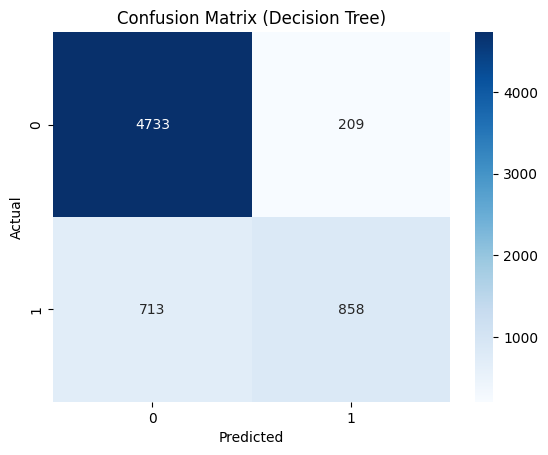

In [12]:
pipeline_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=7, random_state=42))
])
pipeline_tree.fit(X_train, y_train)
y_pred_tree = pipeline_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

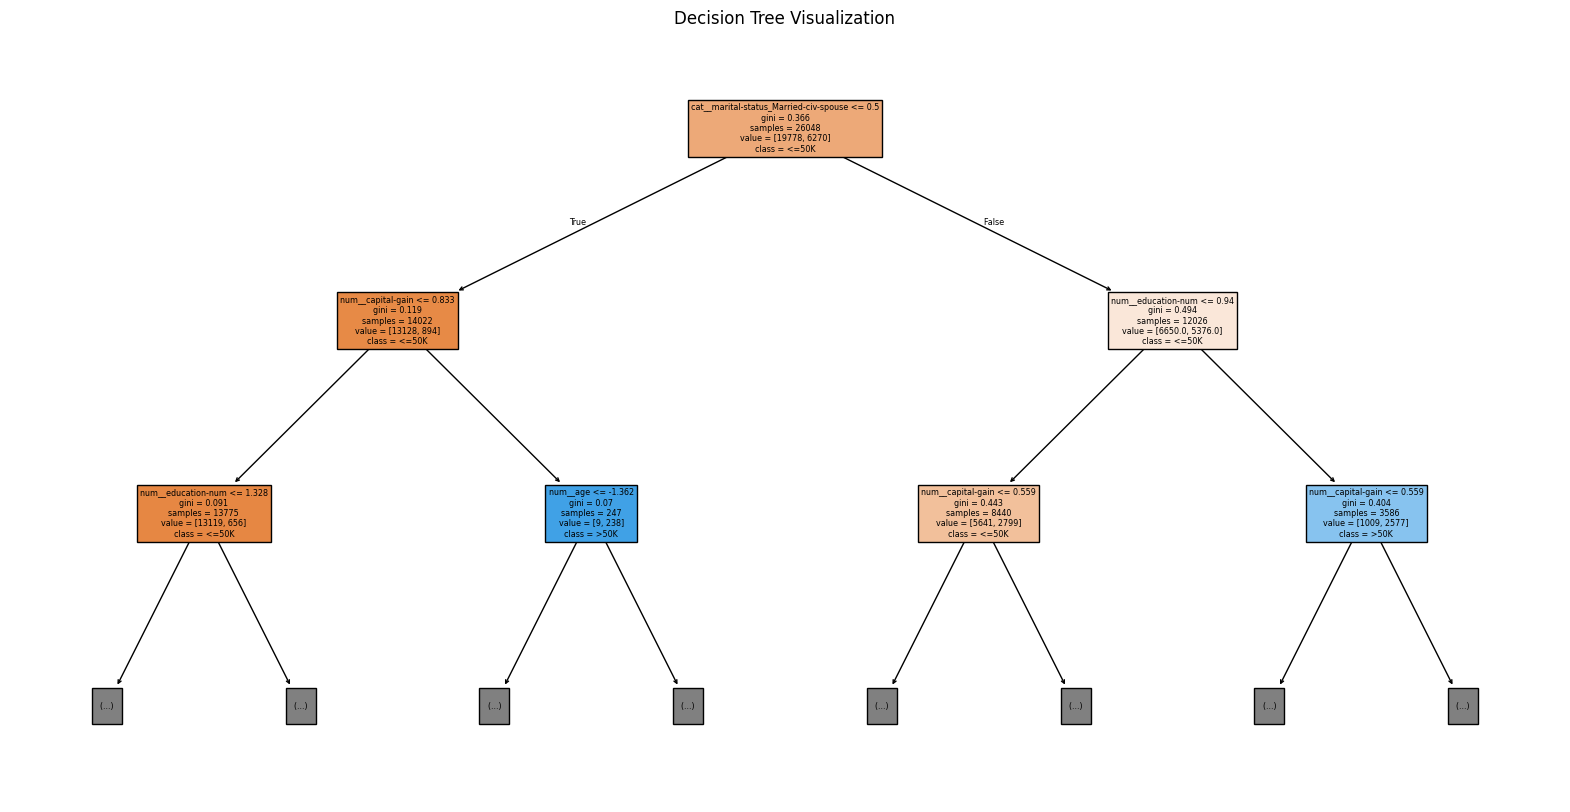

In [13]:
from sklearn.tree import plot_tree

tree_model = pipeline_tree.named_steps['classifier']

plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    filled=True,
    feature_names=pipeline_tree.named_steps['preprocessor'].get_feature_names_out(),
    class_names=['<=50K', '>50K'],
    max_depth=2
)
plt.title("Decision Tree Visualization")
plt.show()

                                   Feature  Importance
32  cat__marital-status_Married-civ-spouse    0.427818
2                       num__education-num    0.223087
3                        num__capital-gain    0.199548
4                        num__capital-loss    0.060117
0                                 num__age    0.043997
5                      num__hours-per-week    0.020170
23                cat__education_Bachelors    0.005386
11         cat__workclass_Self-emp-not-inc    0.004851
1                              num__fnlwgt    0.004773
40         cat__occupation_Exec-managerial    0.002252


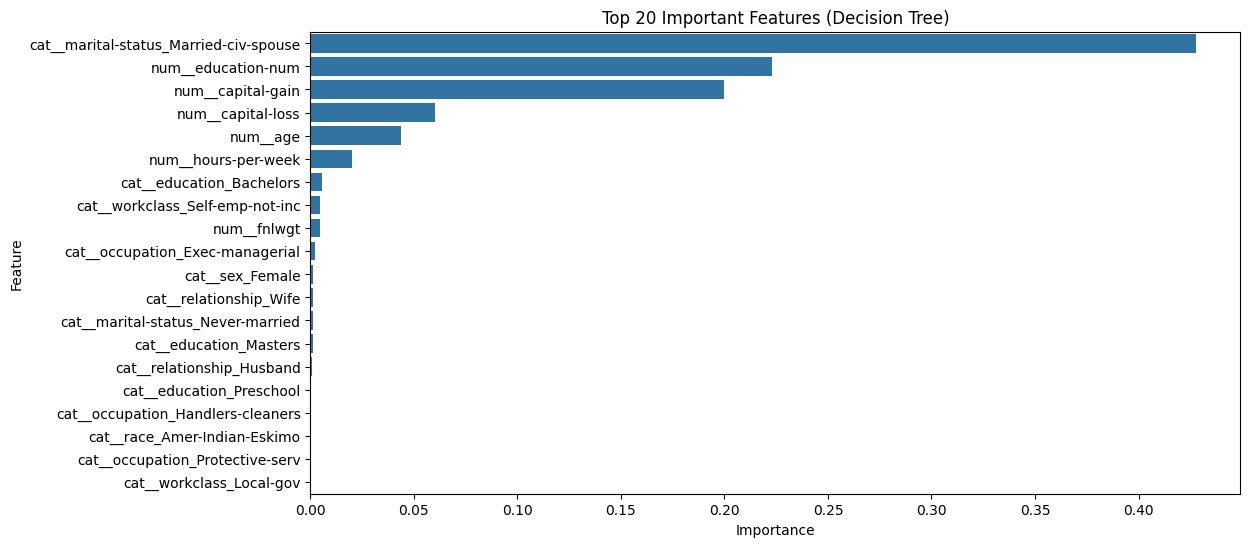

In [14]:
importances = pipeline_tree.named_steps['classifier'].feature_importances_
feature_names = pipeline_tree.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(importance_df.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features (Decision Tree)')
plt.show()

# Random Forest

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]
data = pd.read_csv(
    './machine_learning/datasets/classification/adult.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

data['income'] = data['income'].str.strip()
data['income_binary'] = (data['income'] == '>50K').astype(int)

X = data.drop(['income', 'income_binary'], axis=1)
y = data['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

Random Forest Accuracy: 0.7941040994933211

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      4942
           1       0.55      0.88      0.67      1571

    accuracy                           0.79      6513
   macro avg       0.75      0.82      0.76      6513
weighted avg       0.85      0.79      0.81      6513



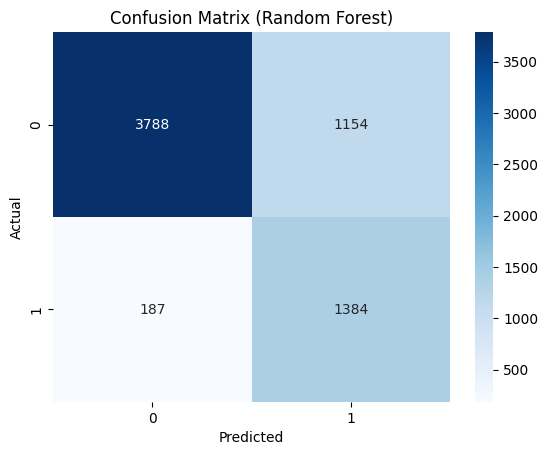

In [16]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced',
        max_features='sqrt'
    ))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

                                   Feature  Importance
32  cat__marital-status_Married-civ-spouse    0.167578
51               cat__relationship_Husband    0.131657
2                       num__education-num    0.090143
3                        num__capital-gain    0.089372
34       cat__marital-status_Never-married    0.082739
0                                 num__age    0.082364
54             cat__relationship_Own-child    0.038126
5                      num__hours-per-week    0.036760
52         cat__relationship_Not-in-family    0.024932
56                  cat__relationship_Wife    0.022161


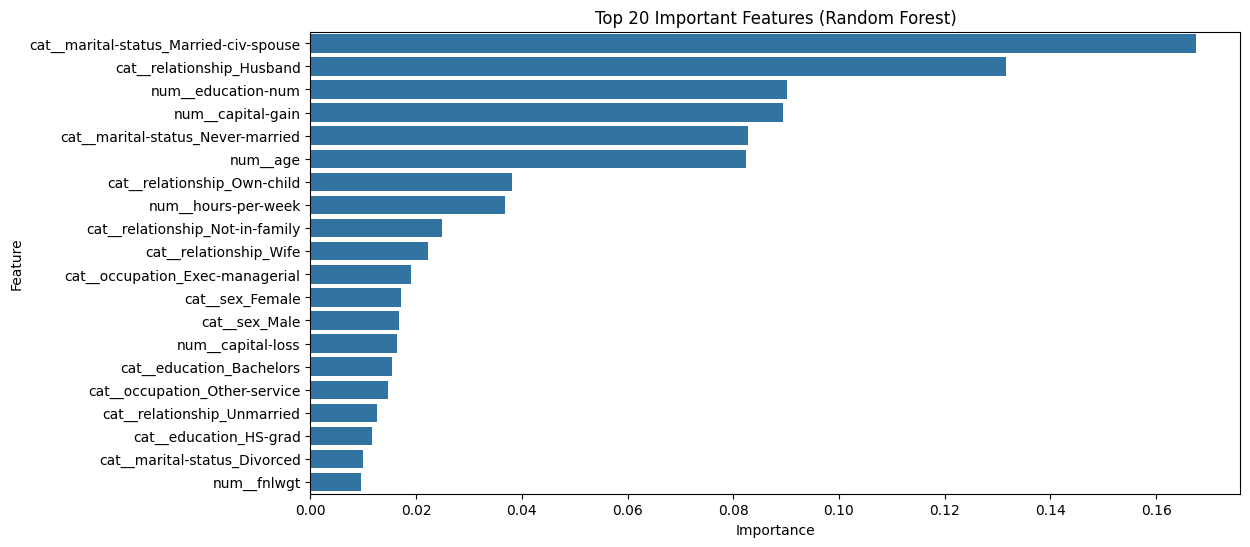

In [17]:
importances = pipeline_rf.named_steps['classifier'].feature_importances_
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(importance_df.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features (Random Forest)')
plt.show()

# Логистическая регрессия

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]
data = pd.read_csv(
    './machine_learning/datasets/classification/adult.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

data['income'] = data['income'].str.strip()
data['income_binary'] = (data['income'] == '>50K').astype(int)

X = data.drop(['income', 'income_binary'], axis=1)
y = data['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [19]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [20]:
pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)
y_proba = pipeline_lr.predict_proba(X_test)[:, 1]

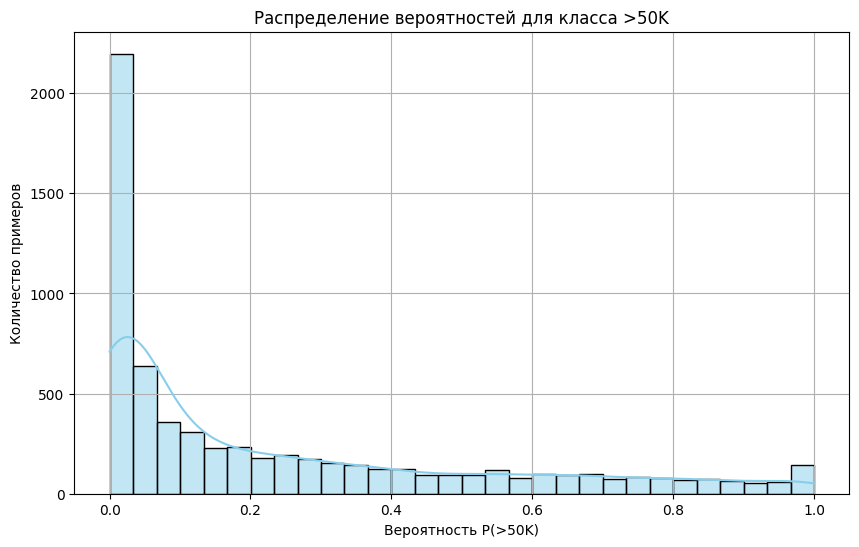

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, bins=30, kde=True, color='skyblue')
plt.title('Распределение вероятностей для класса >50K')
plt.xlabel('Вероятность P(>50K)')
plt.ylabel('Количество примеров')
plt.grid(True)
plt.show()

Logistic Regression Accuracy: 0.8552

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



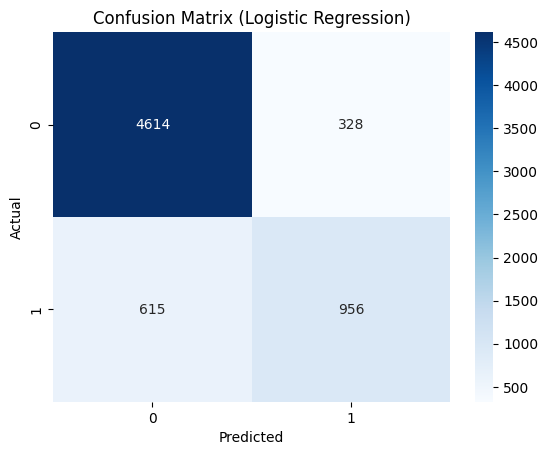

In [22]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

                                   Feature  Coefficient
3                        num__capital-gain     2.207914
32  cat__marital-status_Married-civ-spouse     1.410015
45         cat__occupation_Priv-house-serv    -1.371044
31   cat__marital-status_Married-AF-spouse     1.366907
67            cat__native-country_Columbia    -1.316458
54             cat__relationship_Own-child    -1.218569
34       cat__marital-status_Never-married    -1.119966
85               cat__native-country_Italy     1.108244
64            cat__native-country_Cambodia     1.073035
56                  cat__relationship_Wife     1.028562


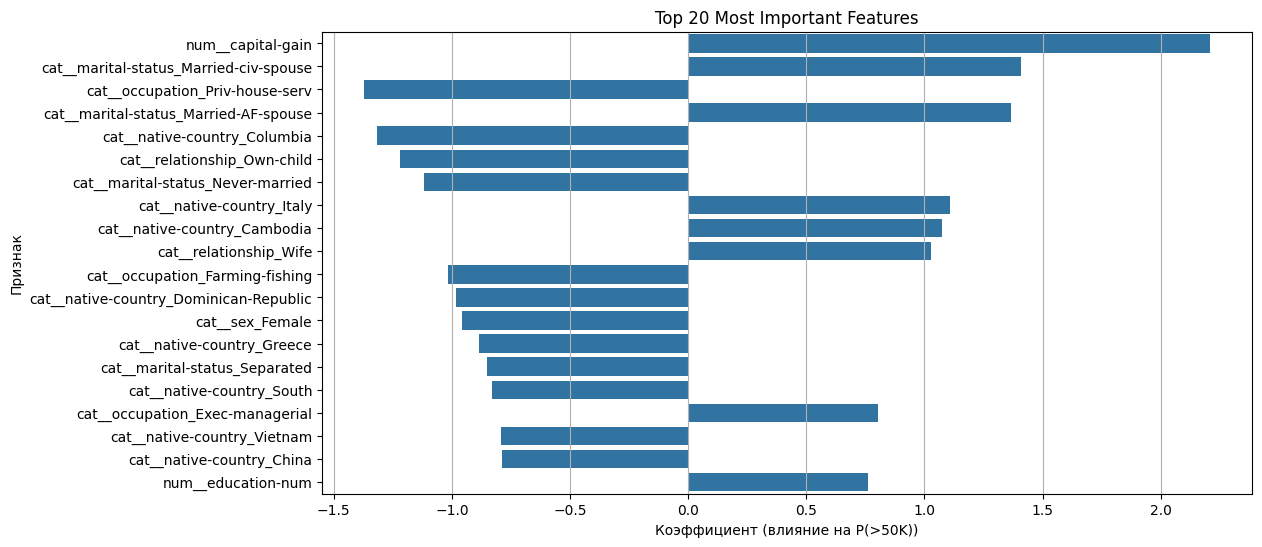

In [23]:
coef = pipeline_lr.named_steps['classifier'].coef_[0]
feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance.head(20),
    x='Coefficient',
    y='Feature',
    )
plt.title('Top 20 Most Important Features')
plt.xlabel('Коэффициент (влияние на P(>50K))')
plt.ylabel('Признак')
plt.grid(axis='x')
plt.show()

# K ближайших соседей

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    ConfusionMatrixDisplay
)
from sklearn.pipeline import Pipeline

columns = ["id", "clump_thickness", "cell_size_uniformity", "cell_shape_uniformity",
           "marginal_adhesion", "single_epithelial_size", "bare_nuclei",
           "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

data = pd.read_csv(
    './machine_learning/datasets/classification/breast-cancer-wisconsin.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)
data = data.dropna().drop(columns=['id'])
data['class'] = data['class'].map({2: 0, 4: 1})
data

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


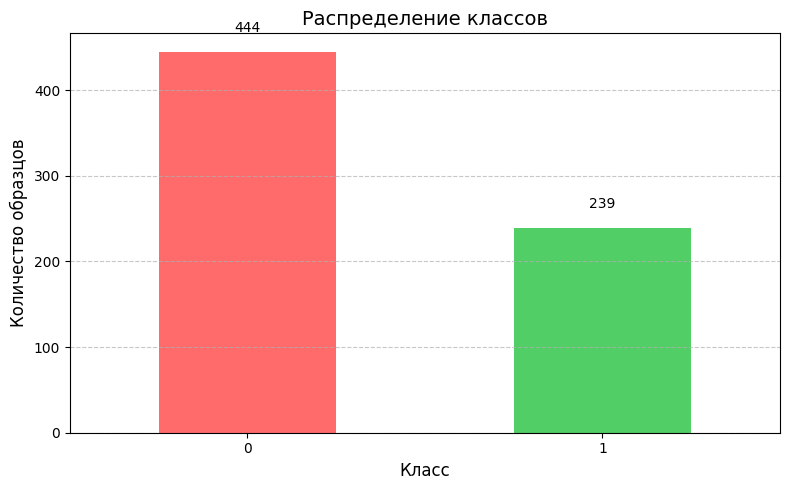

In [25]:
import matplotlib.pyplot as plt

class_distribution = data['class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['#ff6b6b', '#51cf66', '#339af0'])
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество образцов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(class_distribution):
    plt.text(i, value + 20, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Лучшие параметры: {'knn__metric': 'cosine', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

Accuracy: 0.9658536585365853

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.97      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



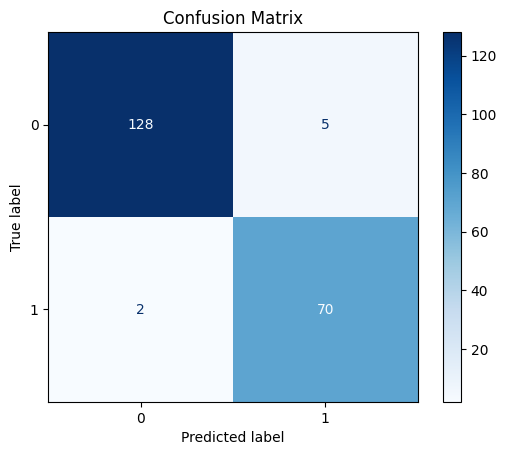

In [26]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': (3, 15),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'cosine']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Метод опорных векторов (SVM)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

columns = ["id", "clump_thickness", "cell_size_uniformity", "cell_shape_uniformity",
           "marginal_adhesion", "single_epithelial_size", "bare_nuclei",
           "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

data = pd.read_csv(
    './machine_learning/datasets/classification/breast-cancer-wisconsin.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)
data = data.dropna().drop(columns=['id'])
data['class'] = data['class'].map({2: 0, 4: 1})

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fitting 5 folds for each of 180 candidates, totalling 900 fits

Лучшие параметры: {'svm__C': 0.1, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Лучшая точность (кросс-валидация): 0.968640350877193

Accuracy: 0.9512195121951219

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       127
           1       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



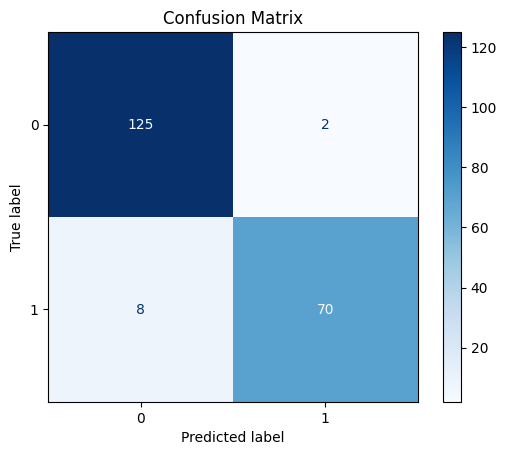

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__degree': [2, 3, 4]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучшая точность (кросс-валидация):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Наивный Байес


Accuracy: 0.9658536585365853

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       127
           1       0.95      0.96      0.96        78

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



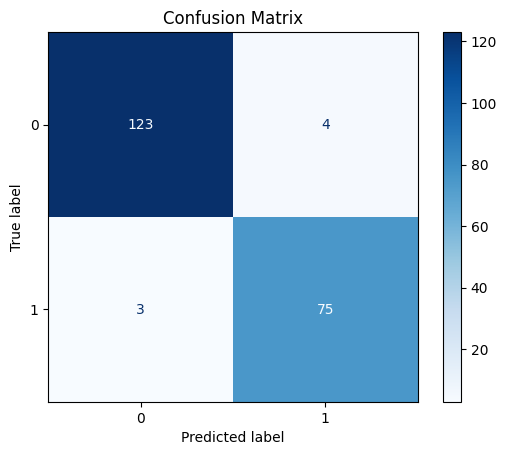

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

columns = ["id", "clump_thickness", "cell_size_uniformity", "cell_shape_uniformity",
           "marginal_adhesion", "single_epithelial_size", "bare_nuclei",
           "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

data = pd.read_csv(
    './machine_learning/datasets/classification/breast-cancer-wisconsin.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

data = data.dropna().drop(columns=['id'])
data['class'] = data['class'].map({2: 0, 4: 1})

X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# k-means, k-means++

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

data = pd.read_csv("./machine_learning/datasets/clustering/Wholesale_customers_data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [31]:
X = data.drop(columns=['Channel', 'Region'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

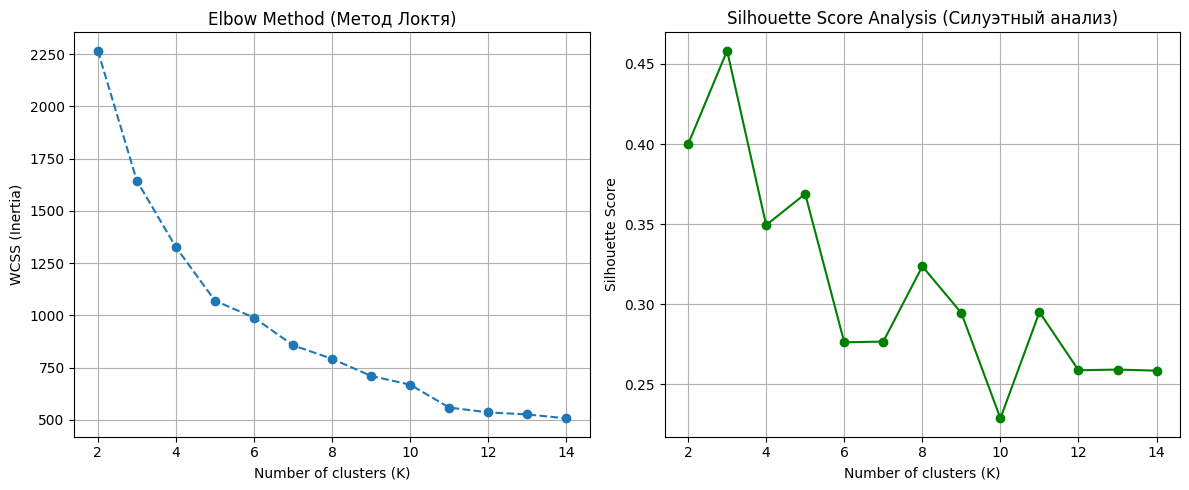

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method (Метод Локтя)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis (Силуэтный анализ)')
plt.grid()
plt.tight_layout()
plt.show()

Silhouette Score: 0.46

Вклад признаков в главные компоненты:
        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1  0.042884  0.545118  0.579256  0.051189          0.548640    0.248682
PC2  0.527932  0.083168 -0.146088  0.611278         -0.255233    0.504207


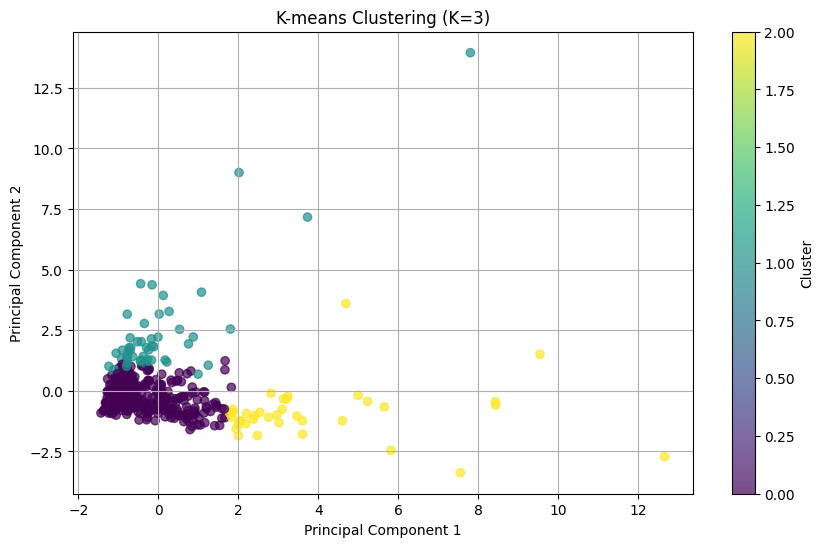


Средние значения по кластерам:
                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0         8935.500000   4228.528571   5848.034286  2167.231429   
1        34540.113208   5860.358491   6122.622642  9841.735849   
2         8704.864865  20534.405405  30466.243243  1932.621622   

         Detergents_Paper   Delicassen  
Cluster                                 
0             1913.605714  1102.120000  
1              981.471698  3664.245283  
2            14758.837838  2459.351351  


In [33]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.2f}")

new_data = X.copy()
new_data['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


print("\nВклад признаков в главные компоненты:")
print(pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=['PC1', 'PC2']
))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering (K={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

cluster_analysis = new_data.groupby('Cluster').mean()
print("\nСредние значения по кластерам:")
print(cluster_analysis)

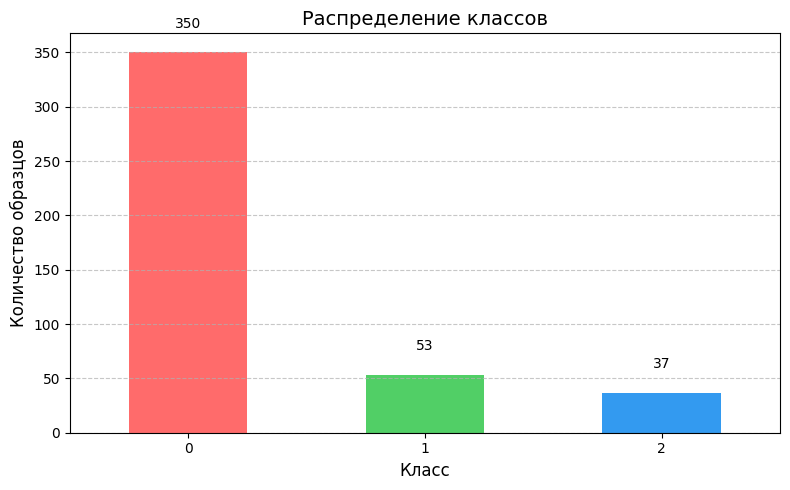

In [34]:
import matplotlib.pyplot as plt

class_distribution = new_data['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['#ff6b6b', '#51cf66', '#339af0'])
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество образцов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(class_distribution):
    plt.text(i, value + 20, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# DBSCAN

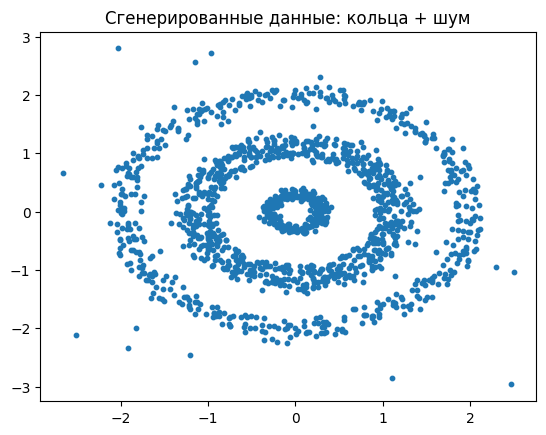

In [35]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

np.random.seed(42)

first_circles, _ = make_circles(n_samples=1000, factor=0.6, noise=0.05)
first_circles *= 2

second_circles, _ = make_circles(n_samples=500, factor=0.3, noise=0.05)

noise = np.random.uniform(low=-3, high=3, size=(20, 2))

X = np.vstack([first_circles, second_circles, noise])

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Сгенерированные данные: кольца + шум")
plt.show()

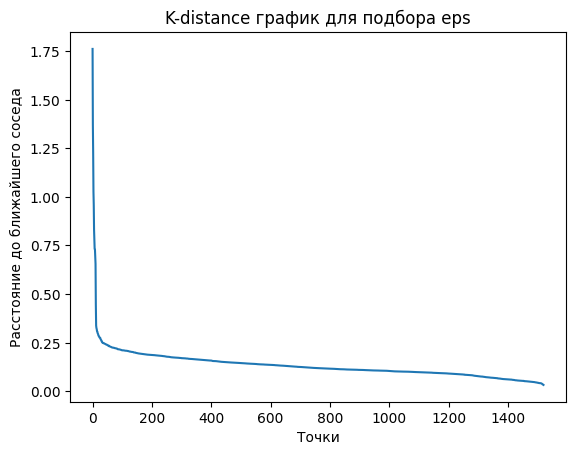

In [36]:
X_scaled = StandardScaler().fit_transform(X)

neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
distances = sorted(distances[:, 9], reverse=True)

plt.plot(distances)
plt.title("K-distance график для подбора eps")
plt.xlabel("Точки")
plt.ylabel("Расстояние до ближайшего соседа")
plt.show()

Найдено кластеров: 3
Точек шума: 12


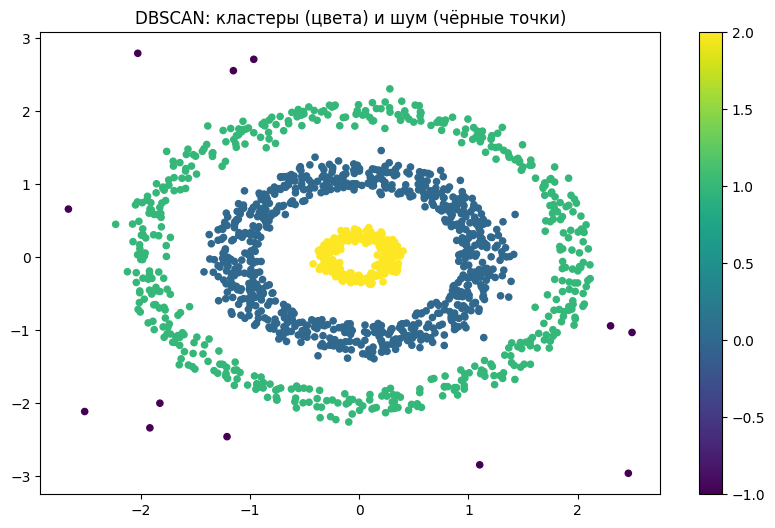

In [37]:
dbscan = DBSCAN(eps=0.25, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

print(f"Найдено кластеров: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Точек шума: {sum(clusters == -1)}")

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=20)
plt.title("DBSCAN: кластеры (цвета) и шум (чёрные точки)")
plt.colorbar()
plt.show()

# Метод главных компонент (PCA)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X, y = fetch_openml('har', version=1, return_X_y=True, as_frame=True)
print(f"Размерность признаков: {X.shape}")
print(f"Размерность целевой переменной: {y.shape}")
print("\nЦелевая переменная (y):\n", y.head())
X

Размерность признаков: (10299, 561)
Размерность целевой переменной: (10299,)

Целевая переменная (y):
 0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: category
Categories (6, object): ['1', '2', '3', '4', '5', '6']


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696664,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


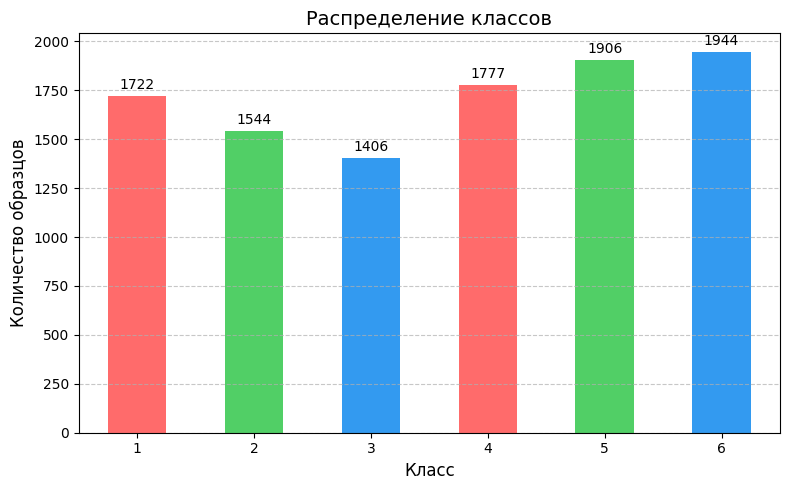

In [39]:
data = pd.concat([X, y], axis=1)

class_distribution = data['Class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['#ff6b6b', '#51cf66', '#339af0'])
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество образцов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(class_distribution):
    plt.text(i, value + 20, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

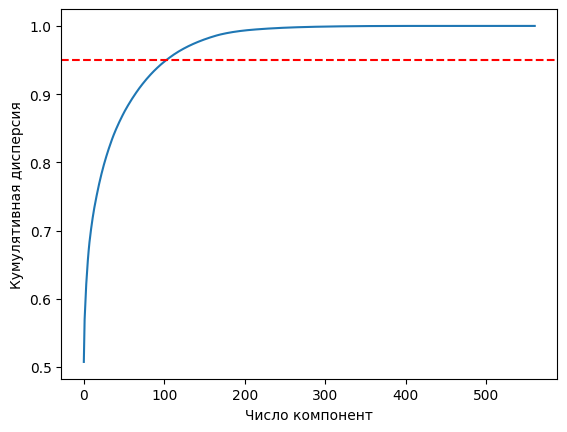

In [40]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA().fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Кумулятивная дисперсия')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Исходное число признаков: {X_train.shape[1]}")
print(f"Число компонент после PCA: {pca.n_components_}")

Исходное число признаков: 561
Число компонент после PCA: 27


Accuracy (без PCA): 0.9764

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       539
           2       0.97      0.99      0.98       424
           3       0.99      0.97      0.98       420
           4       0.96      0.95      0.95       563
           5       0.95      0.96      0.95       547
           6       1.00      1.00      1.00       597

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



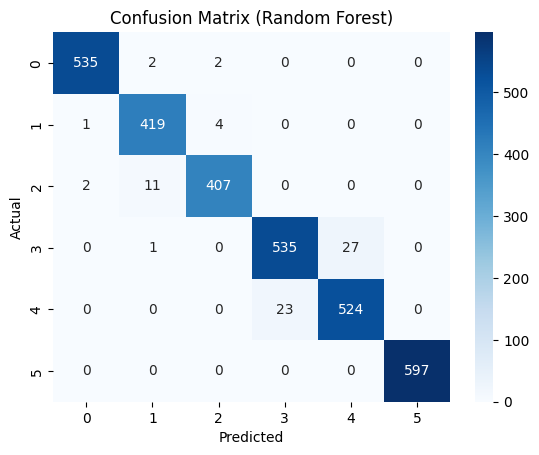

In [42]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(f"Accuracy (без PCA): {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Accuracy (с PCA): 0.9178

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       539
           2       0.94      0.96      0.95       424
           3       0.96      0.94      0.95       420
           4       0.87      0.77      0.82       563
           5       0.81      0.89      0.85       547
           6       0.98      0.99      0.99       597

    accuracy                           0.92      3090
   macro avg       0.92      0.92      0.92      3090
weighted avg       0.92      0.92      0.92      3090



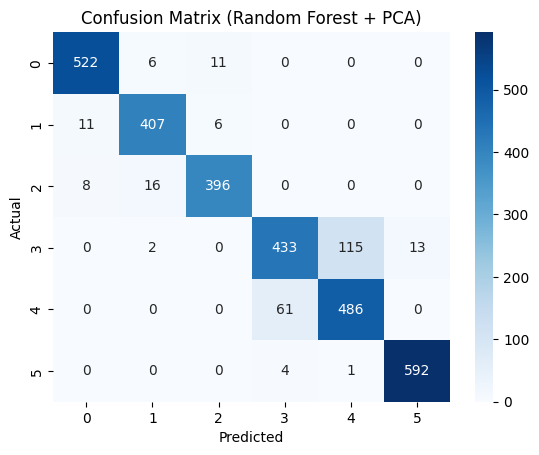

In [43]:
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
print(f"Accuracy (с PCA): {accuracy_score(y_test, y_pred_pca):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

cm_rf = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest + PCA)')
plt.show()

In [44]:
print("\nВклад признаков в главные компоненты:")
print(pd.DataFrame(
    pca.components_,
    columns=X.columns
))


Вклад признаков в главные компоненты:
          V1        V2        V3        V4        V5        V6        V7  \
0  -0.000008 -0.002643 -0.002388  0.056429  0.056762  0.054302  0.056234   
1   0.018002 -0.001955 -0.008998 -0.010272 -0.024322 -0.033062 -0.008789   
2  -0.035568  0.002562  0.015317 -0.026675 -0.025308  0.043199 -0.027313   
3  -0.024569 -0.000437  0.014759  0.039401  0.013334 -0.039353  0.041101   
4  -0.000896 -0.011540 -0.002973 -0.000332  0.010966  0.036499 -0.000666   
5   0.006497  0.015098  0.023487 -0.026251 -0.022372 -0.038309 -0.025351   
6   0.042672 -0.013444 -0.044202 -0.045679  0.013197 -0.034030 -0.047124   
7   0.085490 -0.015465 -0.041184  0.035372 -0.043574 -0.004009  0.034794   
8   0.091452  0.009523 -0.036362  0.000663 -0.009397  0.006655  0.002406   
9  -0.043270 -0.002172  0.038525 -0.039868 -0.001342  0.017476 -0.041294   
10  0.063752  0.011700 -0.043560 -0.016030  0.014695 -0.017425 -0.013159   
11  0.008453  0.019953  0.000874  0.003445 -0.007

# Нейронная сеть прямого распространения, классификация

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

data = pd.read_csv(
    './machine_learning/datasets/classification/adult.data',
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


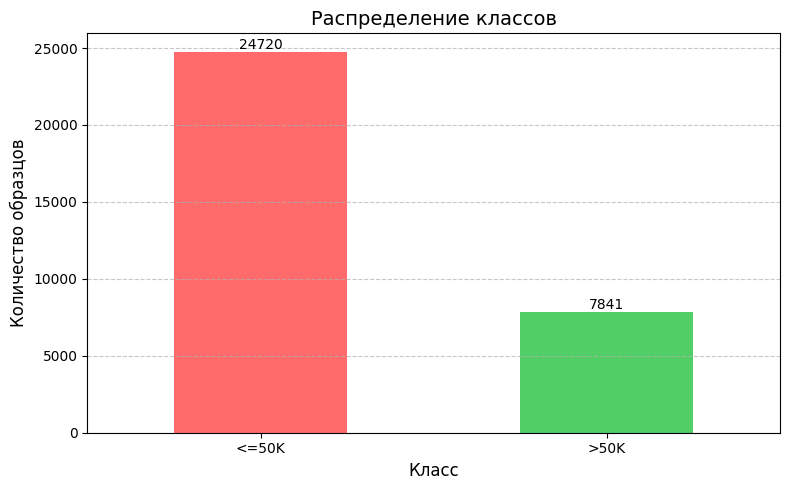

In [46]:
import matplotlib.pyplot as plt

class_distribution = data['income'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['#ff6b6b', '#51cf66', '#339af0'])
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество образцов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(class_distribution):
    plt.text(i, value + 20, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [47]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

data['income'] = data['income'].str.strip()
data['income_binary'] = (data['income'] == '>50K').astype(int)

X = data.drop(['income', 'income_binary'], axis=1)
y = data['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [48]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(early_stopping=True, random_state=42, verbose=True))
])

param_grid = {
    'classifier__hidden_layer_sizes': [(64,), (32, 16)],
    'classifier__activation': ['relu'],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate_init': [0.001],
    'classifier__batch_size': [128, 256]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Iteration 1, loss = 0.46588575
Validation score: 0.840307
Iteration 2, loss = 0.33434529
Validation score: 0.853359
Iteration 3, loss = 0.31853707
Validation score: 0.857198
Iteration 4, loss = 0.31295987
Validation score: 0.857582
Iteration 5, loss = 0.30988249
Validation score: 0.859117
Iteration 6, loss = 0.30792402
Validation score: 0.861804
Iteration 7, loss = 0.30593742
Validation score: 0.858733
Iteration 8, loss = 0.30469524
Validation score: 0.861420
Iteration 9, loss = 0.30337414
Validation score: 0.862188
Iteration 10, loss = 0.30246886
Validation score: 0.859501
Iteration 11, loss = 0.30163911
Validation score: 0.862572
Iteration 12, loss = 0.30097226
Validation score: 0.863340
Iteration 13, loss = 0.29978233
Validation score: 0.862188
Iteration 14, loss = 0.29872741
Validation score: 0.863724
Iteration 15, loss = 0.29771259
Validation score: 0.859885
Iteration 16, loss = 0.29694710
Validation score: 0.862188
Itera


MLPClassifier Accuracy: 0.8599723629663749

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.65      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



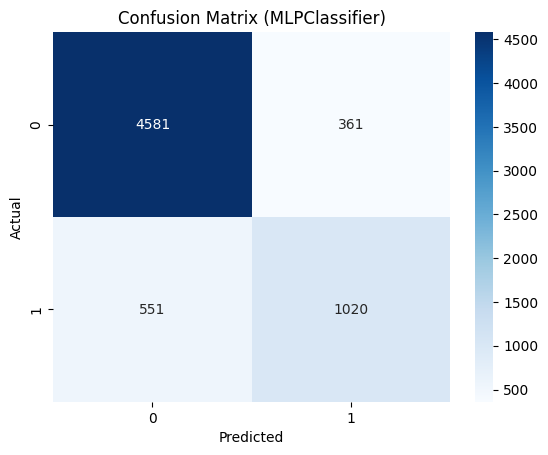

In [49]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nMLPClassifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_tree = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLPClassifier)')
plt.show()

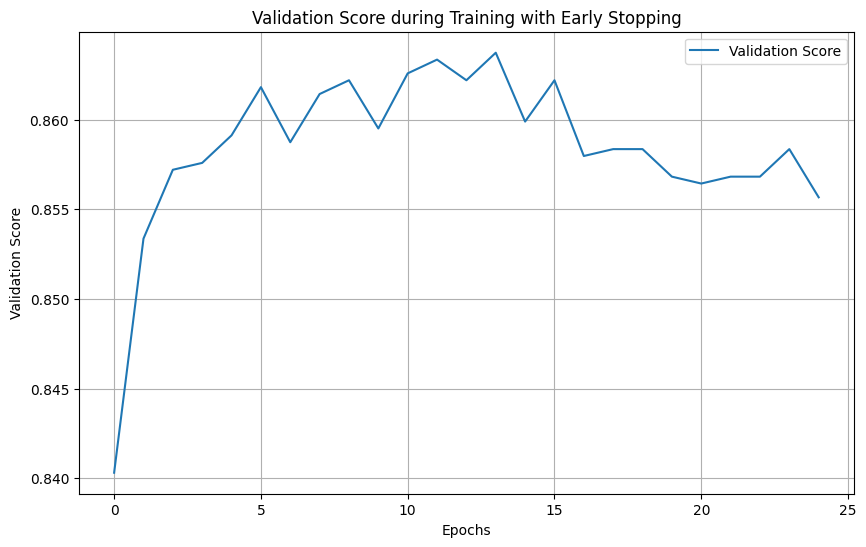

In [50]:
mlp = best_model.named_steps['classifier']
plt.figure(figsize=(10, 6))
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
plt.title('Validation Score during Training with Early Stopping')
plt.legend()
plt.grid()
plt.show()

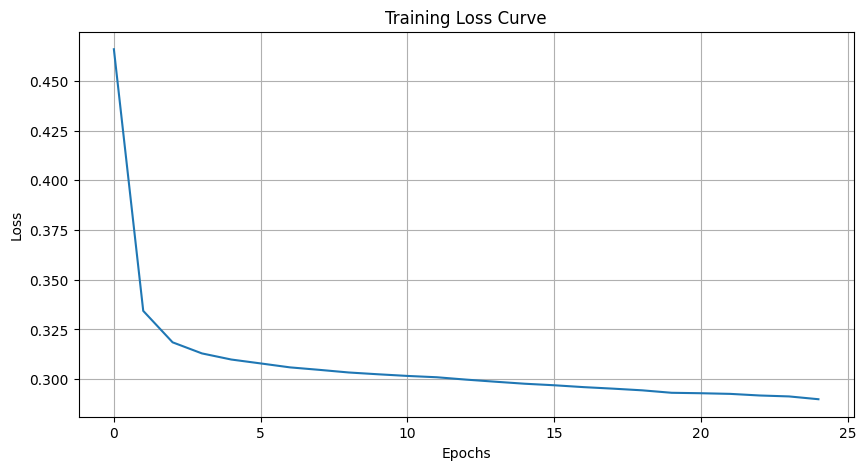

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Нейронная сеть прямого распространения, регрессор

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("./machine_learning/datasets/regression/Laptop_price.csv")
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [53]:
data.dropna(inplace=True)
X = data.drop(columns=["Brand", "Price"])
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(early_stopping=True, random_state=42, verbose=True))
])

param_grid = {
    'regressor__hidden_layer_sizes': [(64,), (32, 16)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__alpha': [0.0001, 0.001],
    'regressor__learning_rate_init': [0.001, 0.01],
    'regressor__batch_size': [32, 64]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Iteration 1, loss = 231855432.80197436
Validation score: -5.047573
Iteration 2, loss = 230902238.57882693
Validation score: -4.997233
Iteration 3, loss = 227240608.35267186
Validation score: -4.831625
Iteration 4, loss = 217475689.51414299
Validation score: -4.443944
Iteration 5, loss = 197564522.82489818
Validation score: -3.739401
Iteration 6, loss = 164733280.80572128
Validation score: -2.705862
Iteration 7, loss = 121294071.25775568
Validation score: -1.435163
Iteration 8, loss = 73637480.15489379
Validation score: -0.256112
Iteration 9, loss = 34512122.69295789
Validation score: 0.546792
Iteration 10, loss = 11647091.68214492
Validation score: 0.886673
Iteration 11, loss = 3730138.05560845
Validation score: 0.962173
Iteration 12, loss = 2049116.70152379
Validation score: 0.972579
Iteration 13, loss = 1702957.57285999
Validation score: 0.976072
Iteration 14, loss = 1518159.93027691
Validation score: 0.978295
Iteration 15,

In [54]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R²: {r2_score(y_true, y_pred)}\n")

evaluate_model(y_test, y_pred, "MLP Regressor")

Model: MLP Regressor
MAE: 251.88381193803295
MSE: 114625.78157862496
RMSE: 338.5642946009295
R²: 0.9987375535704497



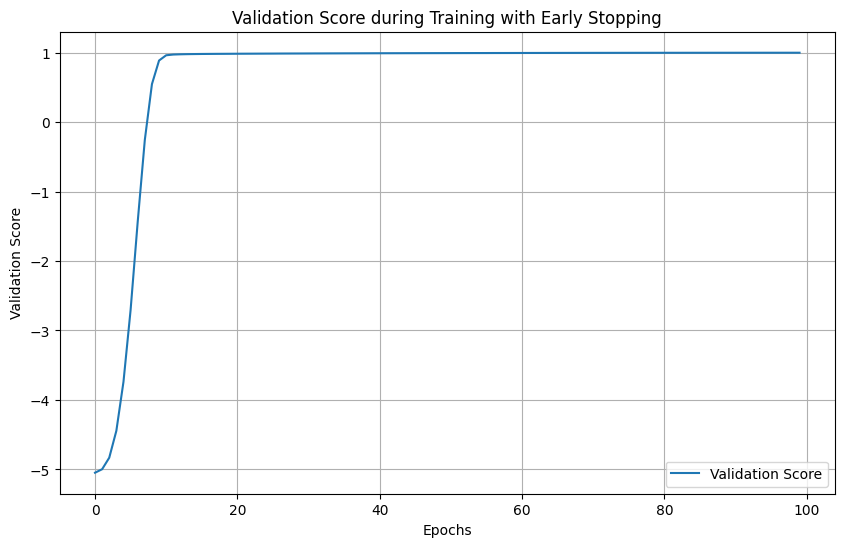

In [55]:
mlp = best_model.named_steps['regressor']
plt.figure(figsize=(10, 6))
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.title('Validation Score during Training with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Validation Score')
plt.grid()
plt.legend()
plt.show()

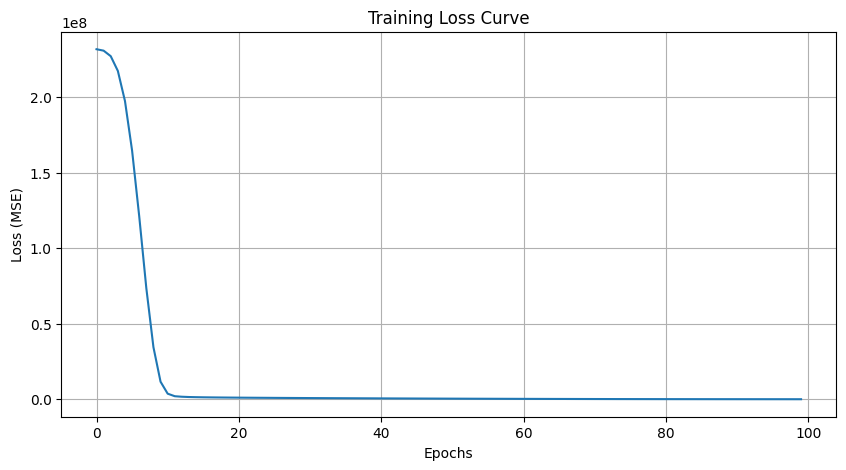

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid()
plt.show()